In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('yahoo Finanace_industry - Stock Market.csv')
df.head()

,Symbol,Name,Price,Change,market cap,PE_ratio
0,BRK-B,Berkshire Hathaway Inc.,321.26,-1.38,709.361B,NaN
1,V,Visa Inc.,230.76,-0.25,483.304B,30.81
2,JPM,JPMorgan Chase & Co.,133.89,-2.16,392.325B,9.90
3,MA,Mastercard Incorporated,380.21,-3.18,359.338B,37.85
4,JPM-PD,JPMorgan Chase & Co.,24.57,-0.08,326.427B,1.82


In [20]:
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
print('\n')
print('The dataset has {} duplicate rows'.format(df.duplicated().sum()))
print('\n')
print('The dataset has {} null values'.format(df.isnull().sum().sum()))

The dataset has 1250 rows and 6 columns


The dataset has 812 duplicate rows


The dataset has 15 null values


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      1250 non-null   object 
 1   Name        1250 non-null   object 
 2   Price       1250 non-null   object 
 3   Change      1250 non-null   float64
 4   market cap  1250 non-null   object 
 5   PE_ratio    1235 non-null   float64
dtypes: float64(2), object(4)
memory usage: 58.7+ KB


In [22]:
# Fill in the missing values
df['PE_ratio'] = df['PE_ratio'].fillna(df['PE_ratio'].mean())

In [23]:
# Drop duplicates
df.drop_duplicates(inplace=True)

## EDA

In [24]:
df['Name'].value_counts()

Name
Wells Fargo & Company                     31
Morgan Stanley                            27
The Goldman Sachs Group, Inc.             24
The Charles Schwab Corporation            22
PayPal Holdings, Inc.                     21
Bank of America Corporation               20
Citigroup Inc.                            19
The Progressive Corporation               19
CME Group Inc.                            16
Blackstone Inc.                           15
American Express Company                  15
Intercontinental Exchange, Inc.           12
KKR & Co. Inc.                            12
BlackRock, Inc.                           12
Moody's Corporation                       11
Marsh & McLennan Companies, Inc.          11
Chubb Limited                             11
S&P Global Inc.                           10
Brookfield Corporation                    10
The Toronto-Dominion Bank                  9
HDFC Bank Limited                          9
U.S. Bancorp                               8
Aon p

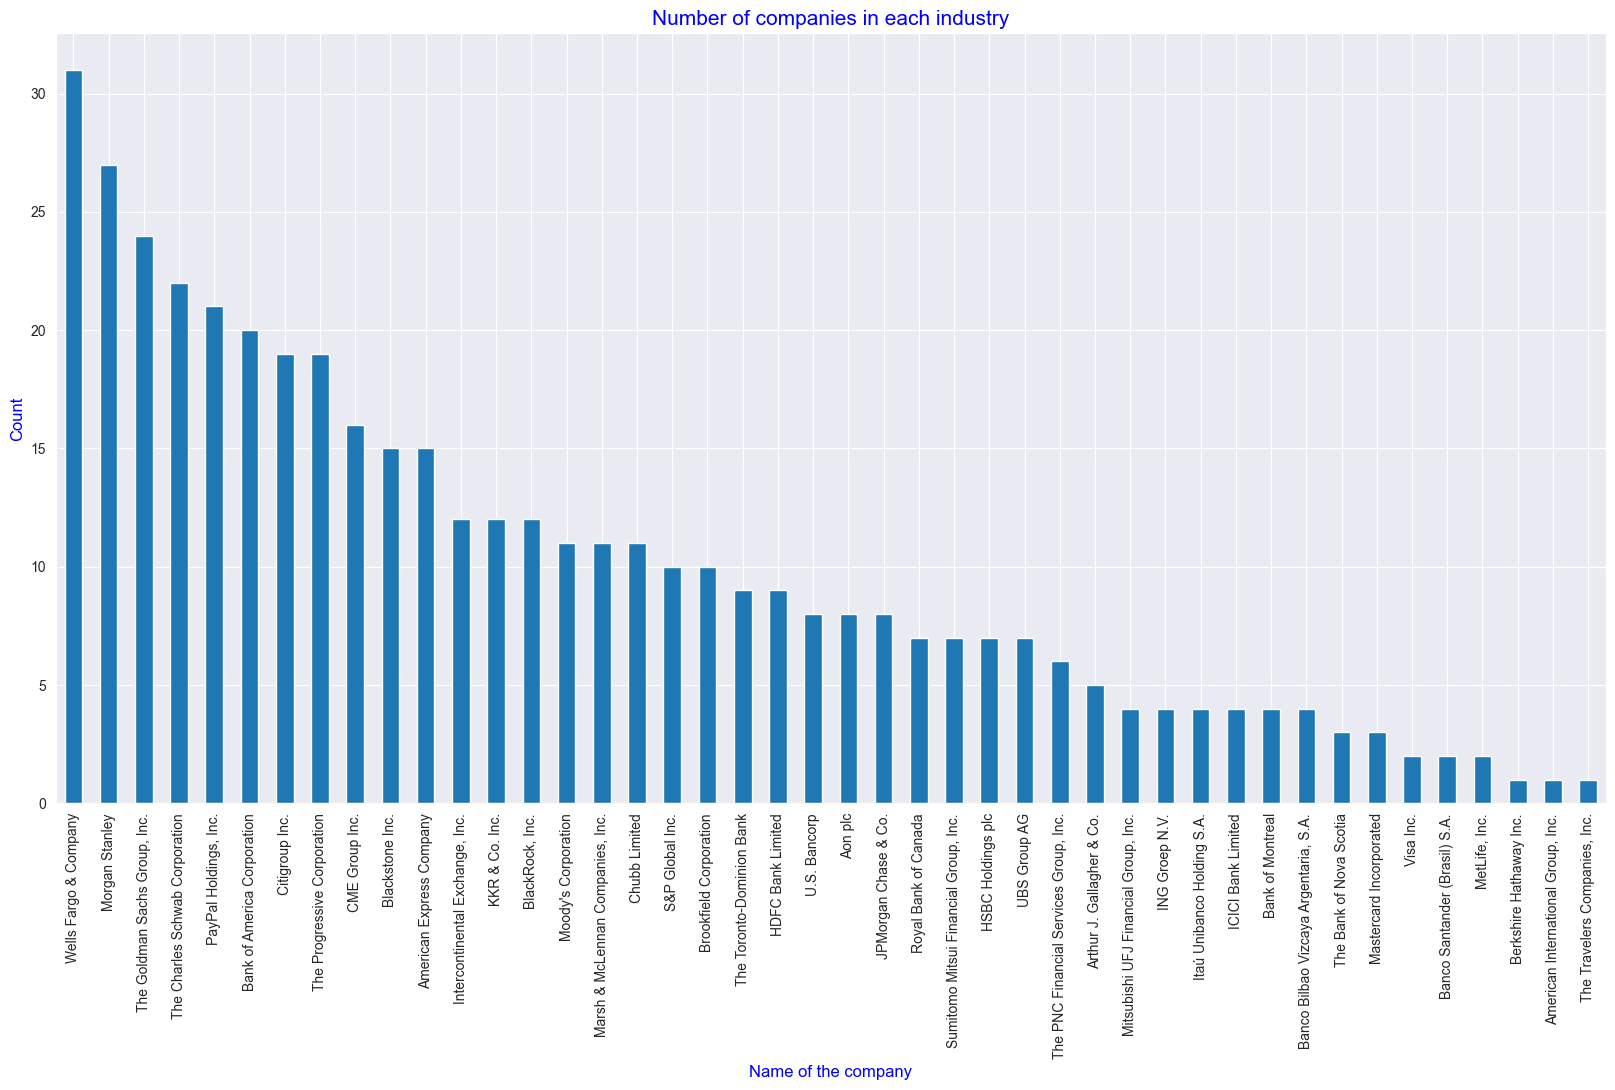

In [25]:
sns.set_style('darkgrid')
df['Name'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.title('Number of companies in each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Count', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

In [26]:
df['market cap'].dtype

dtype('O')

In [32]:
df['market cap'] = df['market cap'].str.replace('B', 'e9')
df['market cap'] = df['market cap'].astype(float)

sym_marketcap = df.groupby('Name')['market cap'].sum().sort_values(ascending=False)
sym_marketcap

Name
Wells Fargo & Company                     4.840466e+12
Bank of America Corporation               4.376324e+12
Morgan Stanley                            3.027912e+12
JPMorgan Chase & Co.                      2.814763e+12
The Goldman Sachs Group, Inc.             2.144700e+12
The Charles Schwab Corporation            1.919144e+12
Citigroup Inc.                            1.800606e+12
American Express Company                  1.655892e+12
PayPal Holdings, Inc.                     1.520853e+12
The Progressive Corporation               1.504761e+12
Blackstone Inc.                           1.483577e+12
BlackRock, Inc.                           1.181366e+12
S&P Global Inc.                           1.148599e+12
HDFC Bank Limited                         1.135607e+12
Mastercard Incorporated                   1.078300e+12
CME Group Inc.                            1.072564e+12
HSBC Holdings plc                         1.058249e+12
The Toronto-Dominion Bank                 1.007184e+12
Marsh

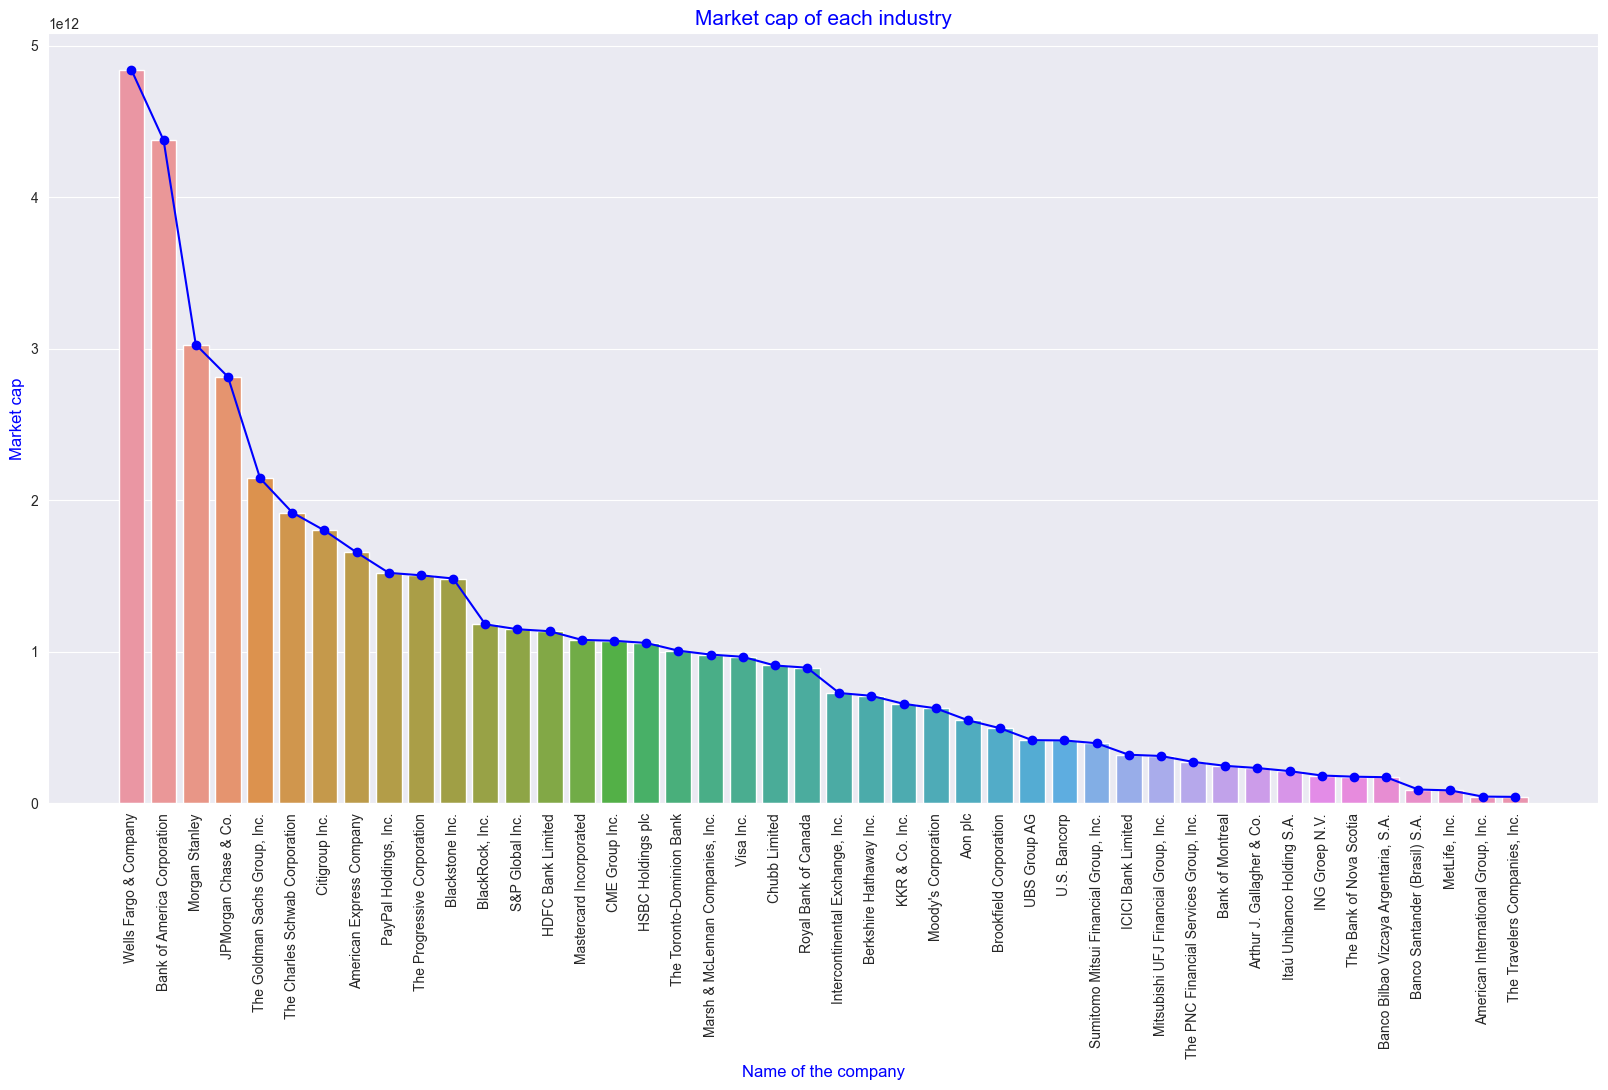

In [37]:
plt.figure(figsize=(20, 10))
sns.barplot(x=sym_marketcap.index, y=sym_marketcap.values)
plt.plot(sym_marketcap.index, sym_marketcap.values, marker='o', color='b')
plt.title('Market cap of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Market cap', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

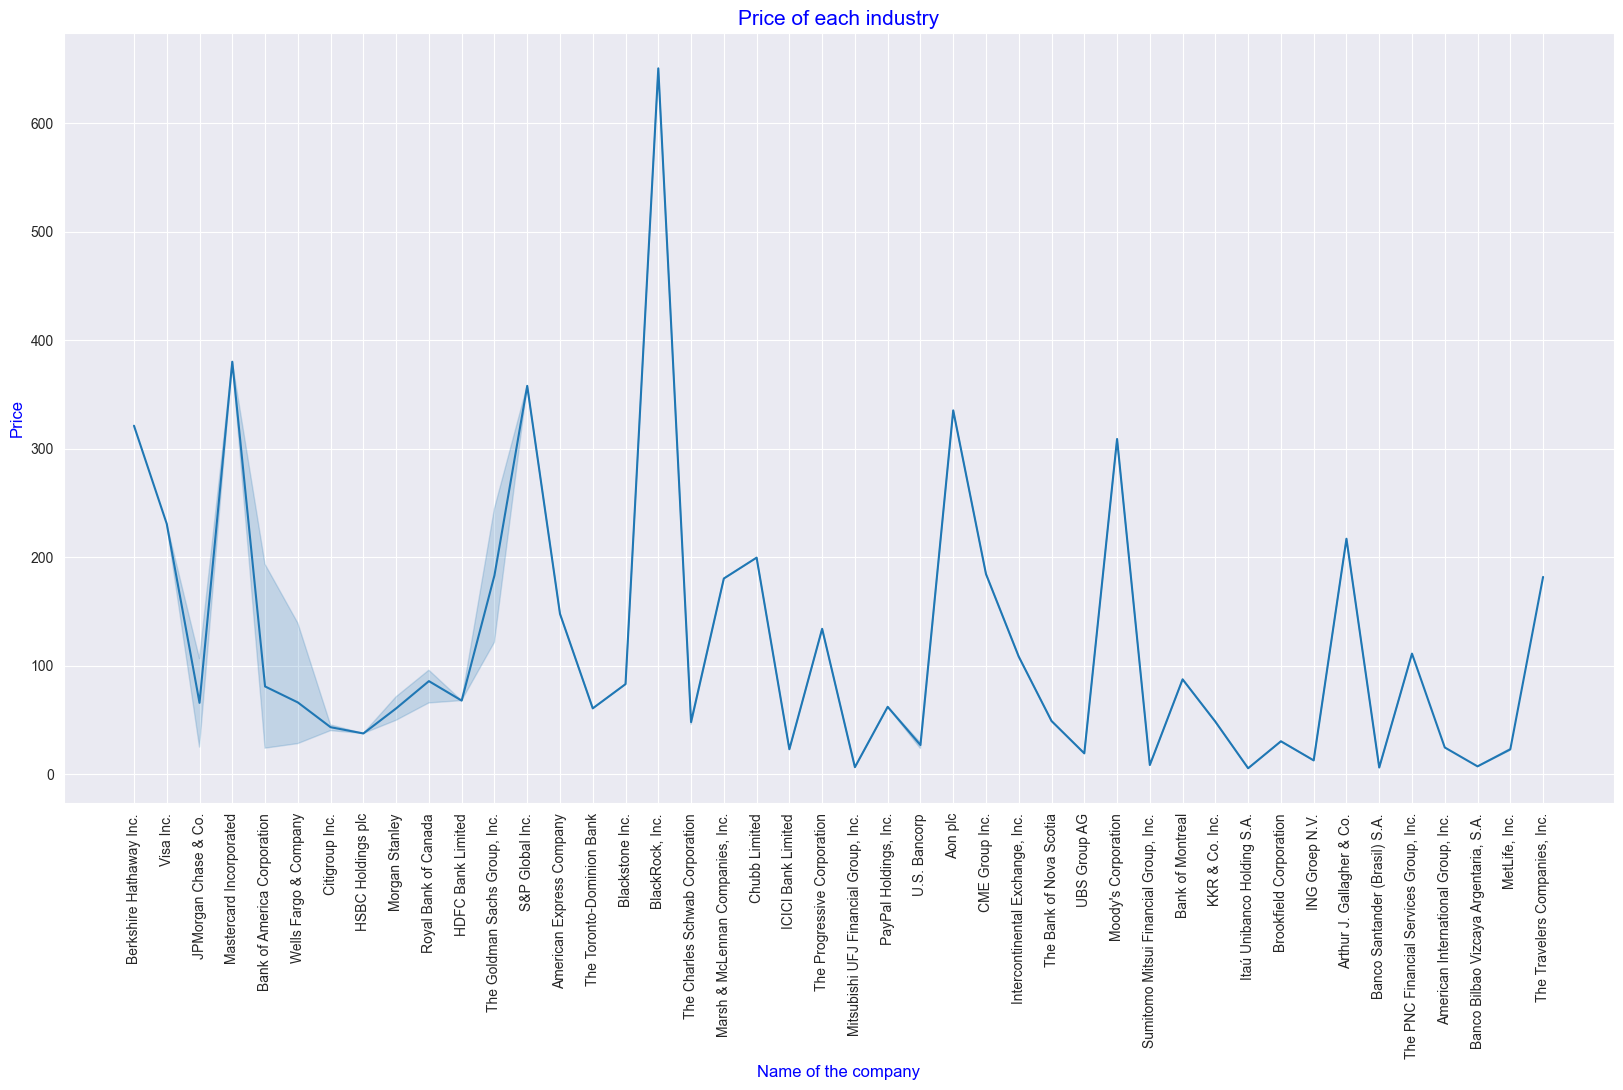

In [44]:
# price
#df['Price'] = df['Price'].str.replace(',', '')
#df['Price'] = df['Price'].astype(float)
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='Price', data=df)
plt.title('Price of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Price', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

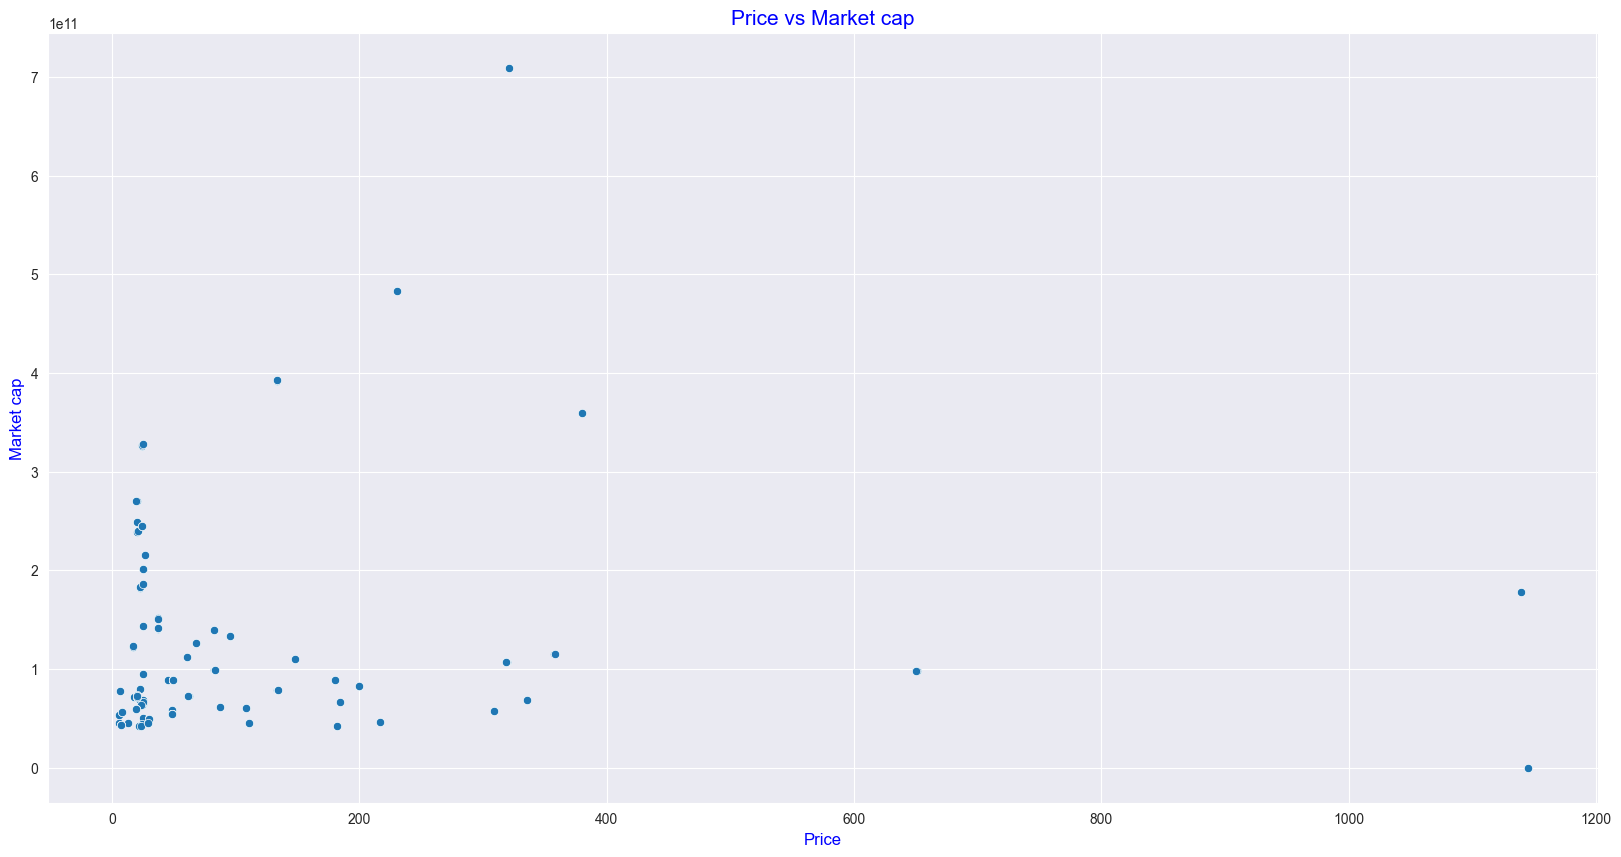

In [45]:
# price and market cap
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='market cap', data=df)
plt.title('Price vs Market cap', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Market cap', fontsize=12, c='b')
plt.show();

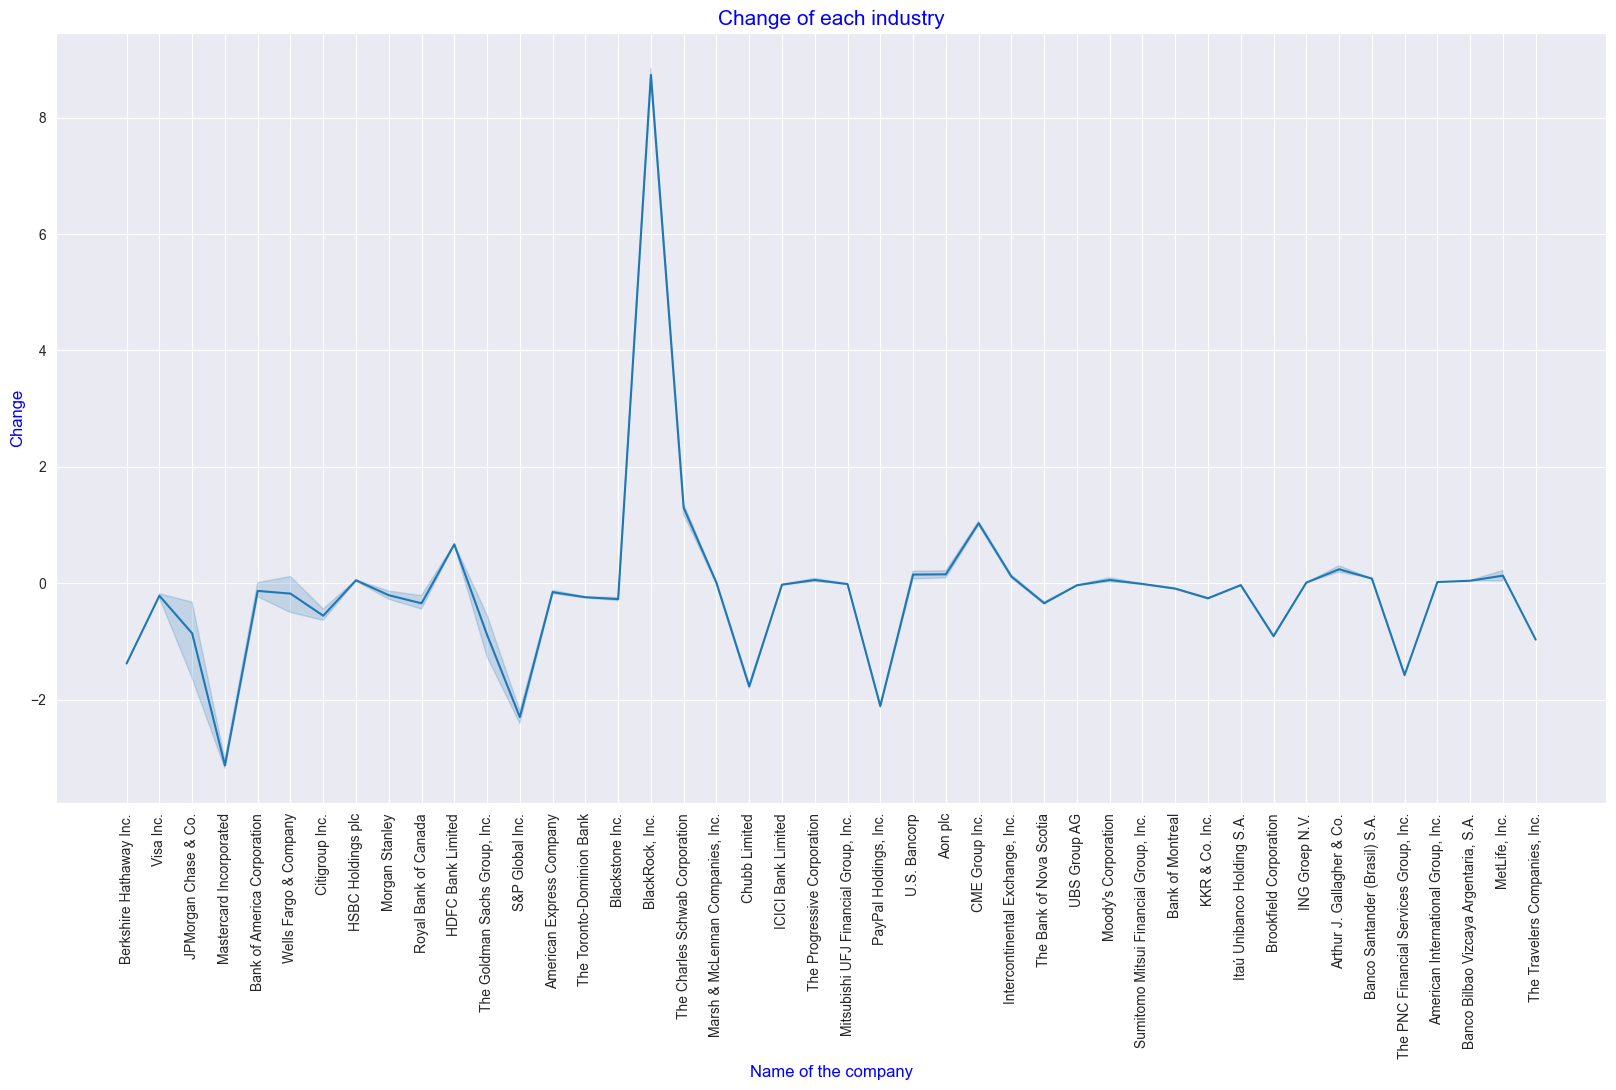

In [46]:
# Change 
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='Change', data=df)
plt.title('Change of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

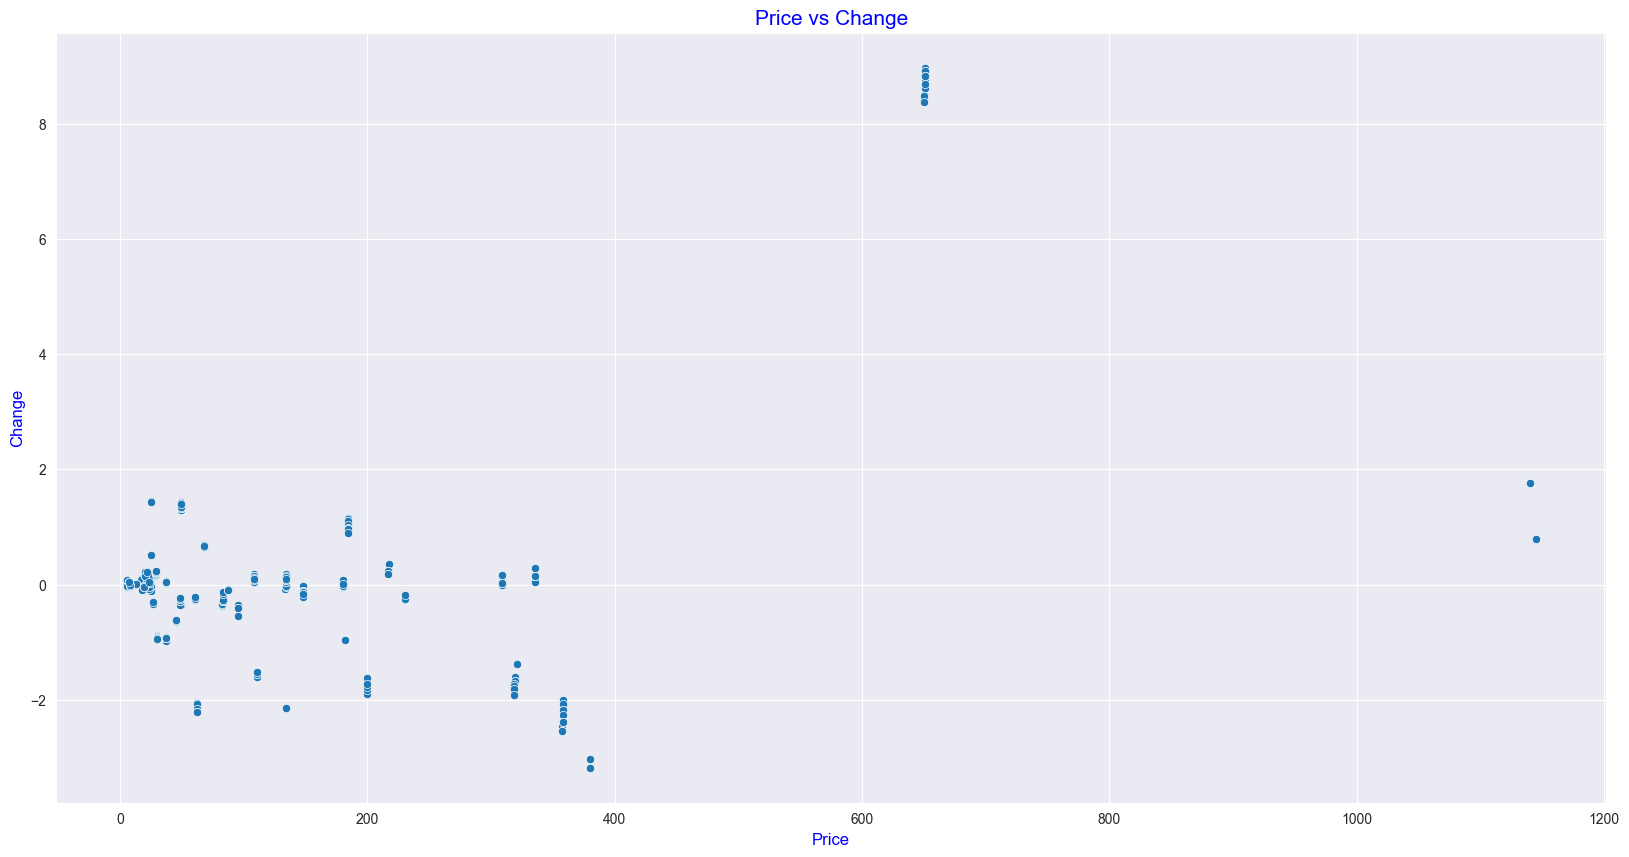

In [47]:
# price and change
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='Change', data=df)
plt.title('Price vs Change', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.show();

* PE ratio is the ratio of the stock price to the earnings per share. It is a measure of the price paid for the stock relative to the annual net income or profit earned by the firm per share. A higher PE ratio means that investors are paying more for each unit of net income, so the stock is more expensive compared to one with lower PE ratio.

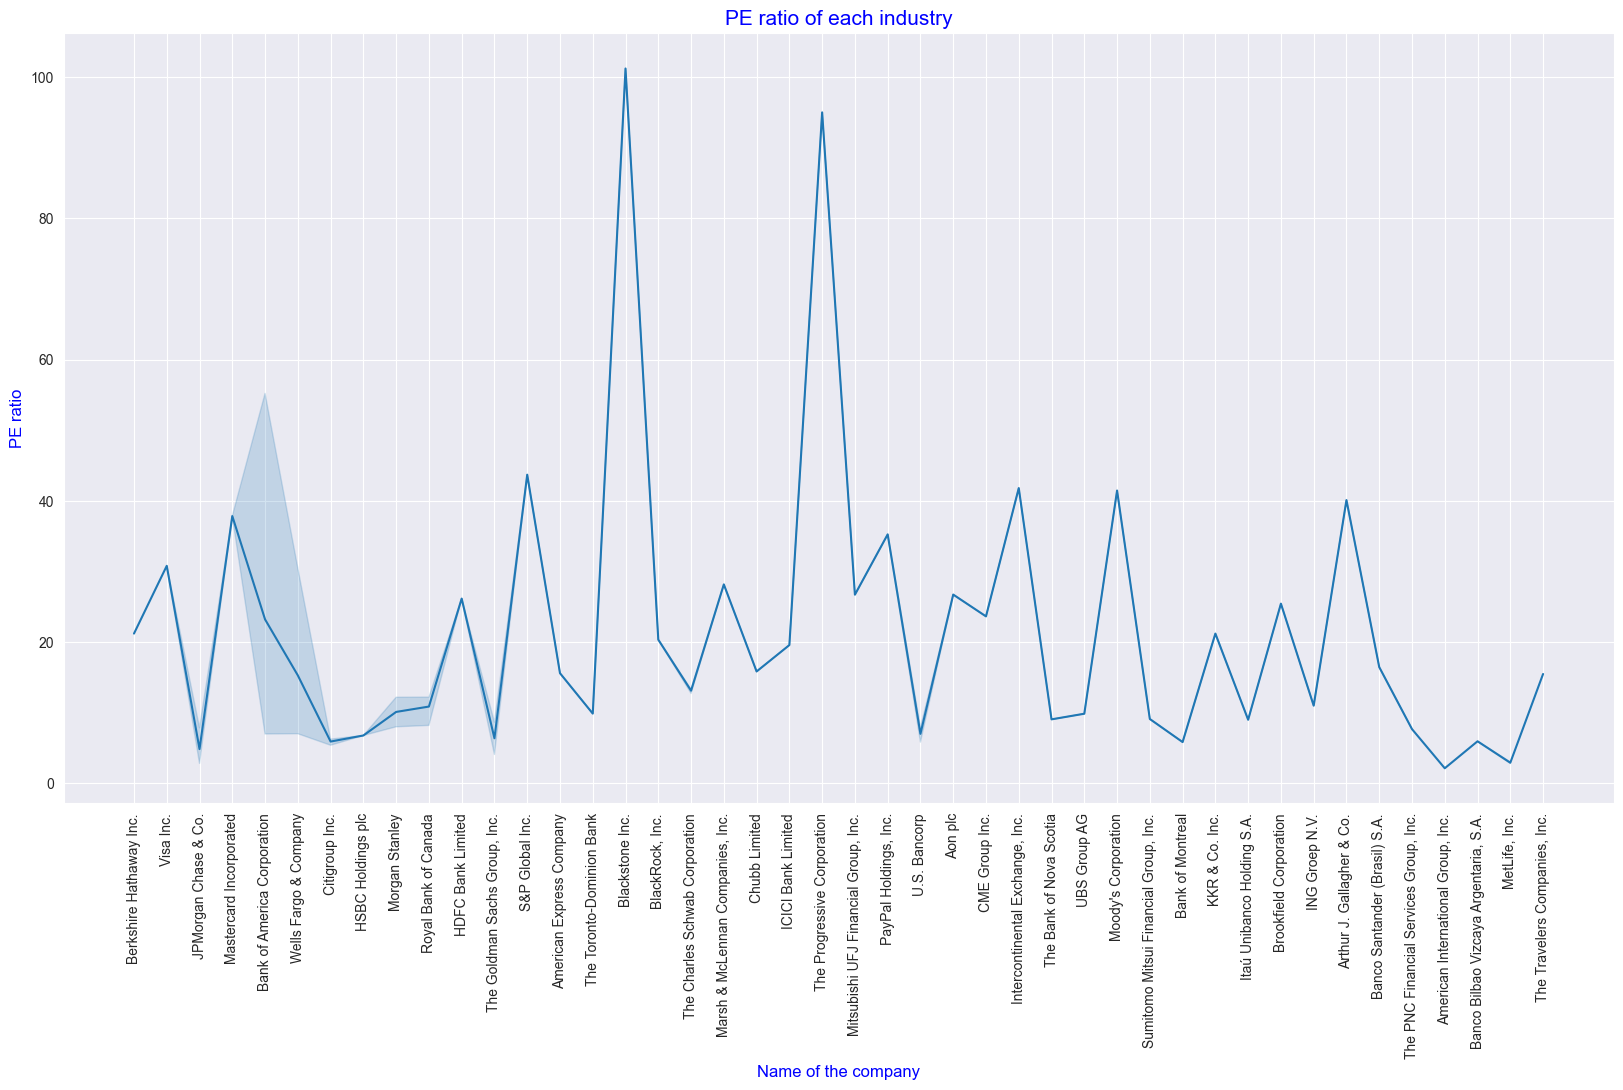

In [48]:
# PE ratio
plt.figure(figsize=(20, 10))
sns.lineplot(x='Name', y='PE_ratio', data=df)
plt.title('PE ratio of each industry', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('PE ratio', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

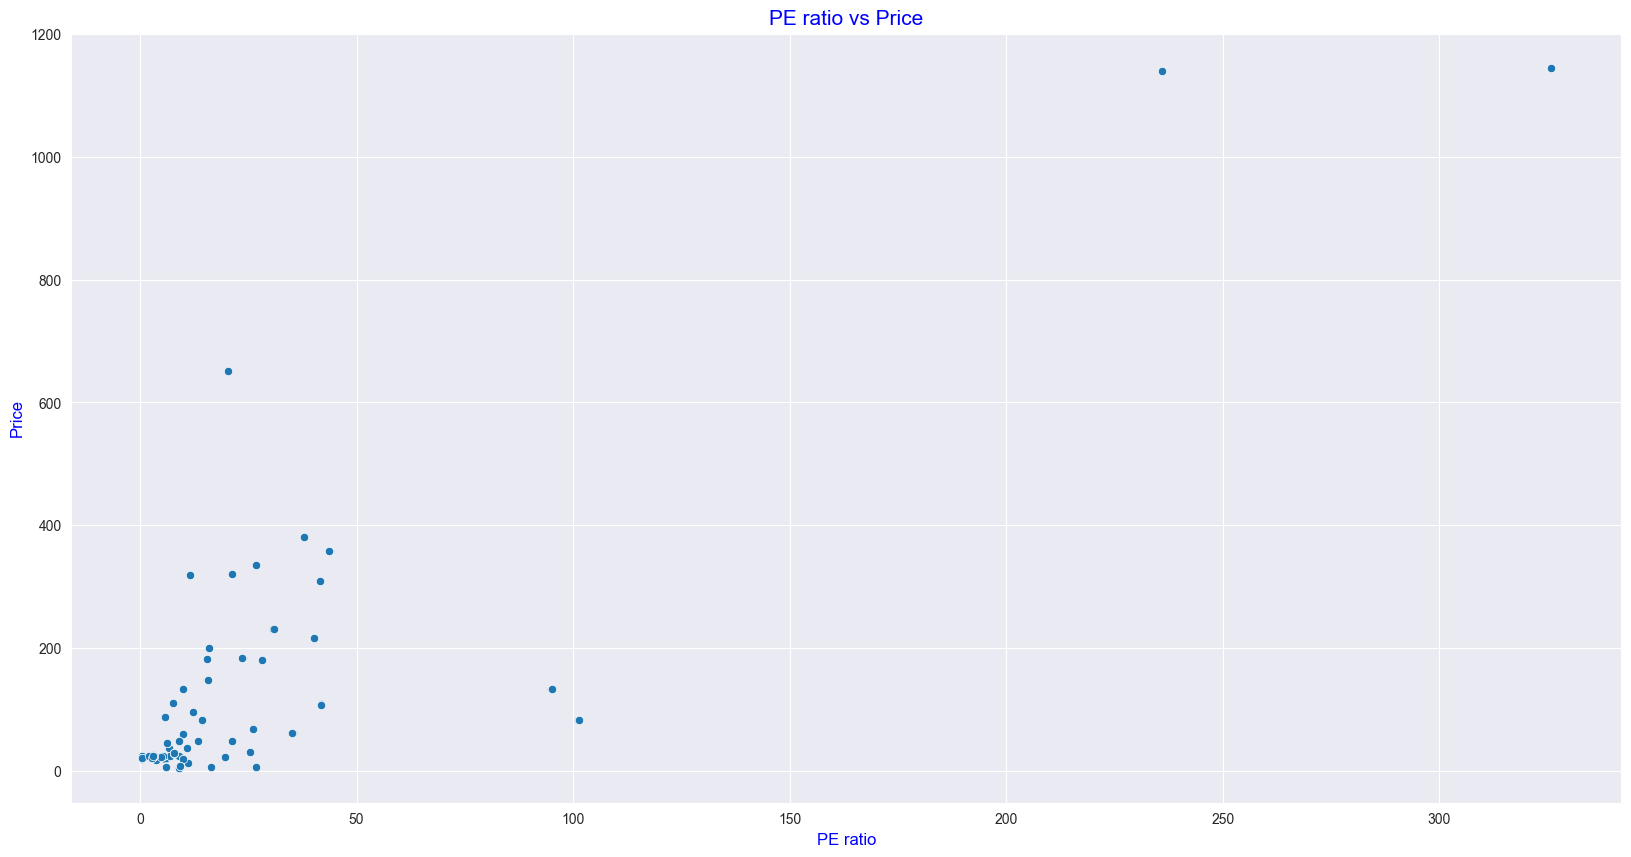

In [49]:
# PE ratio and price
plt.figure(figsize=(20, 10))
sns.scatterplot(x='PE_ratio', y='Price', data=df)
plt.title('PE ratio vs Price', fontsize=15, c='b')
plt.xlabel('PE ratio', fontsize=12, c='b')
plt.ylabel('Price', fontsize=12, c='b')
plt.show();

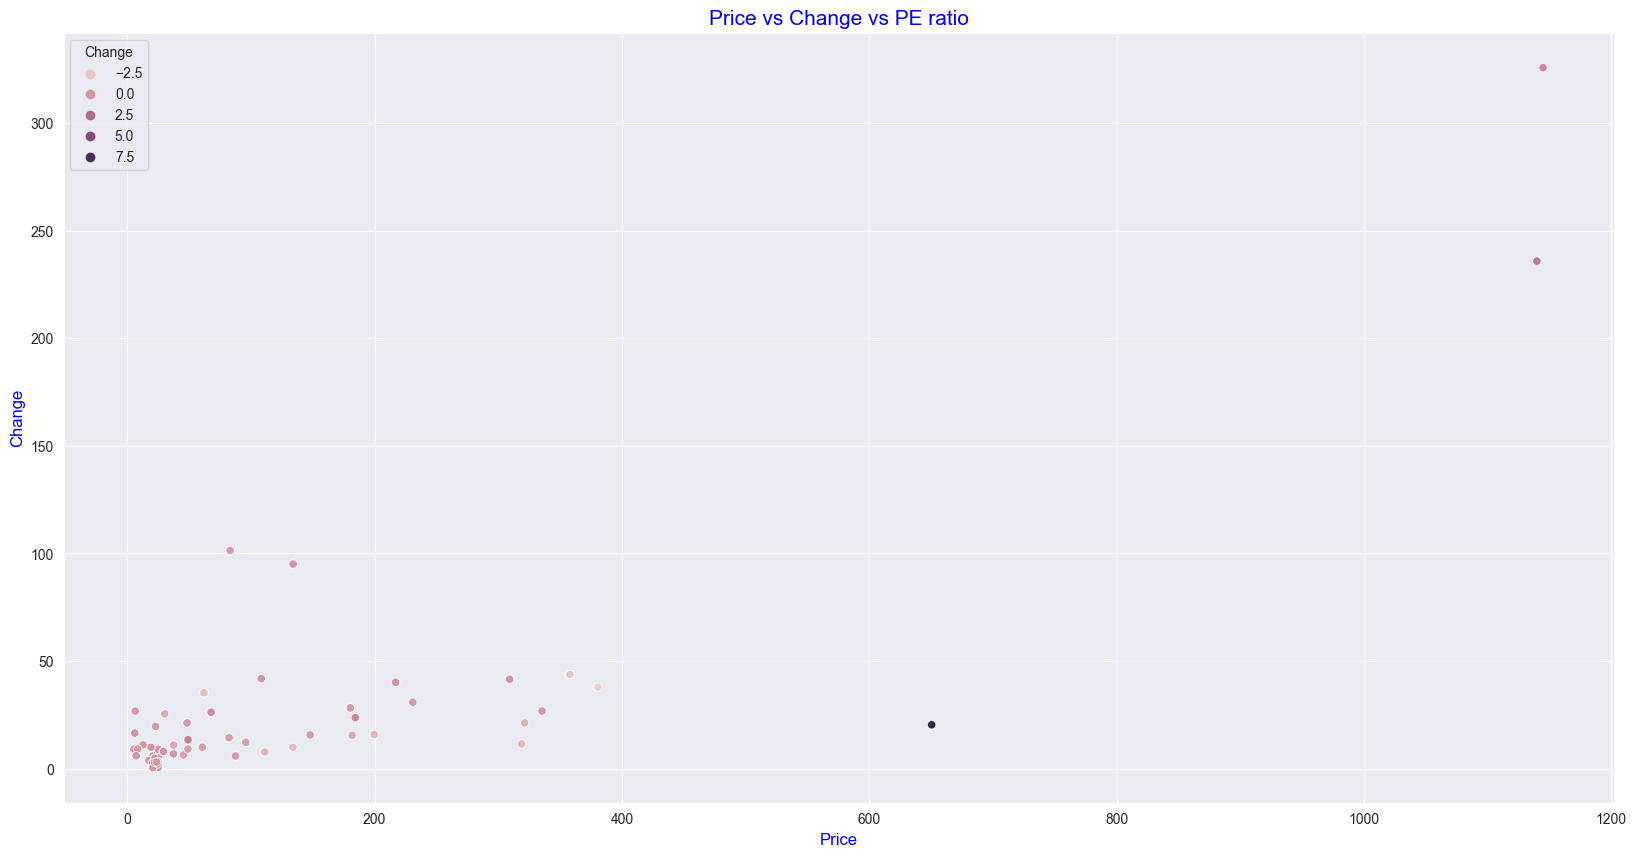

In [51]:
# Price v Change v PE ratio
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Price', y='PE_ratio', hue='Change', data=df)
plt.title('Price vs Change vs PE ratio', fontsize=15, c='b')
plt.xlabel('Price', fontsize=12, c='b')
plt.ylabel('Change', fontsize=12, c='b')
plt.show();

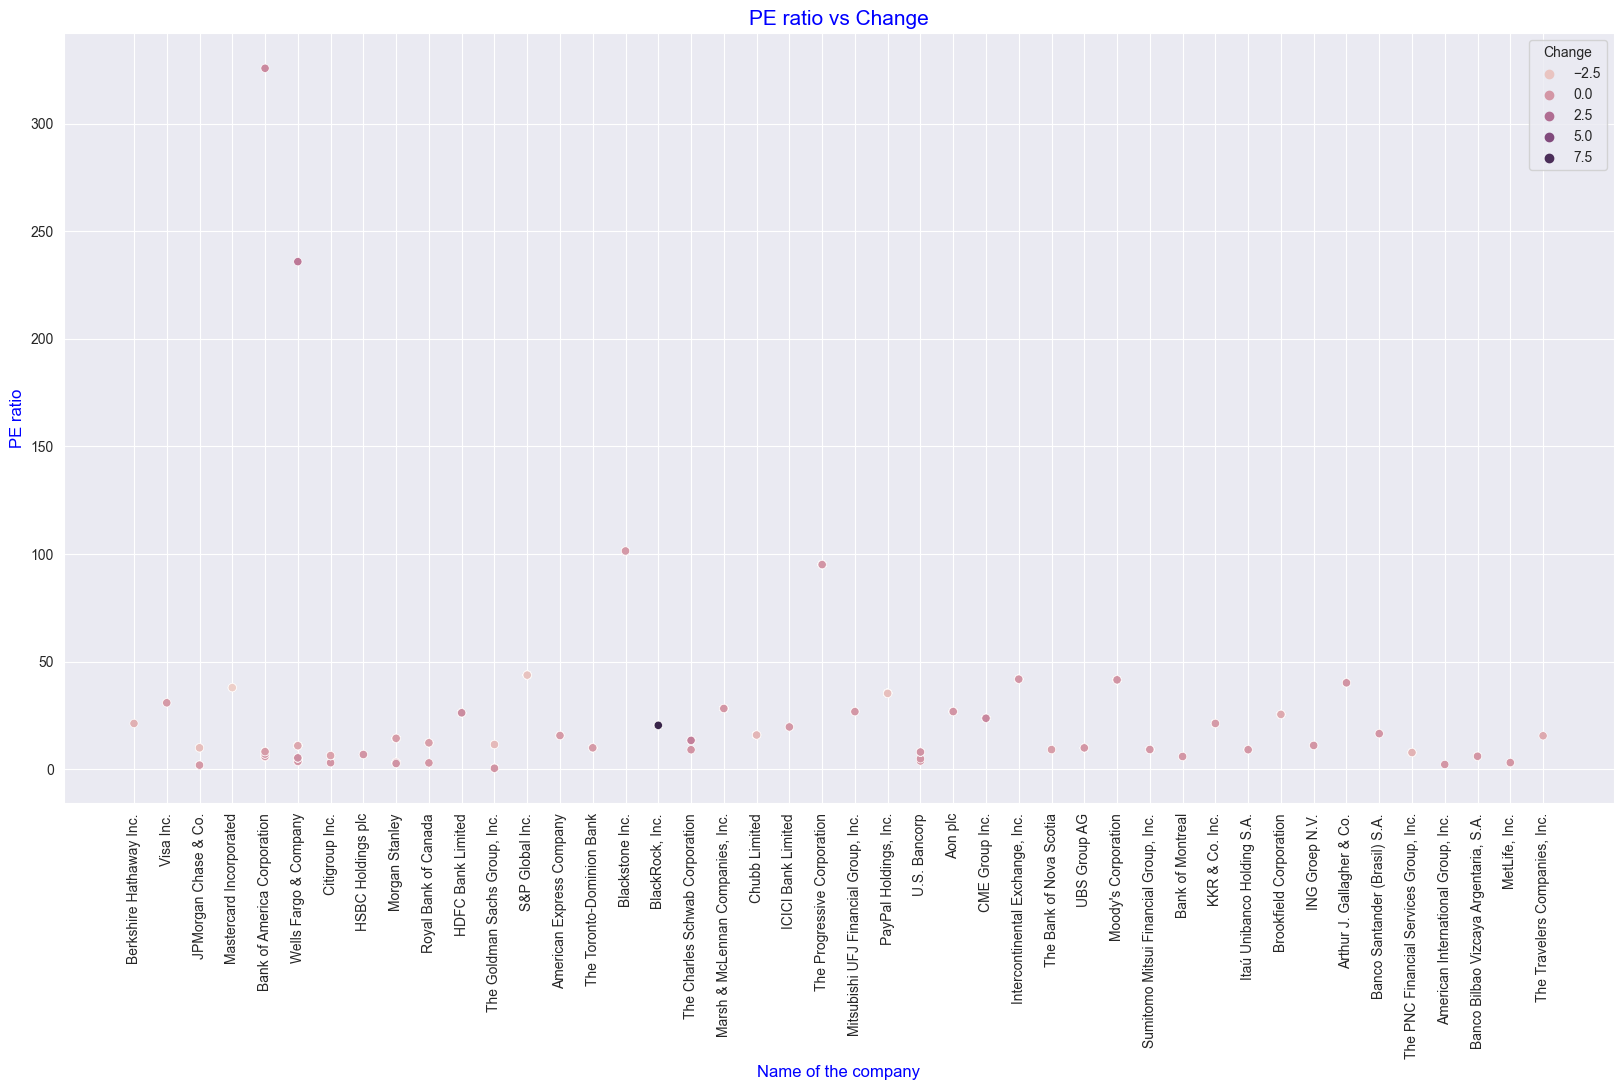

In [56]:
# Price v Change v PE ratio
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Name', y='PE_ratio', hue='Change', data=df)
plt.title('PE ratio vs Change', fontsize=15, c='b')
plt.xlabel('Name of the company', fontsize=12, c='b')
plt.ylabel('PE ratio', fontsize=12, c='b')
plt.xticks(rotation=90)
plt.show();

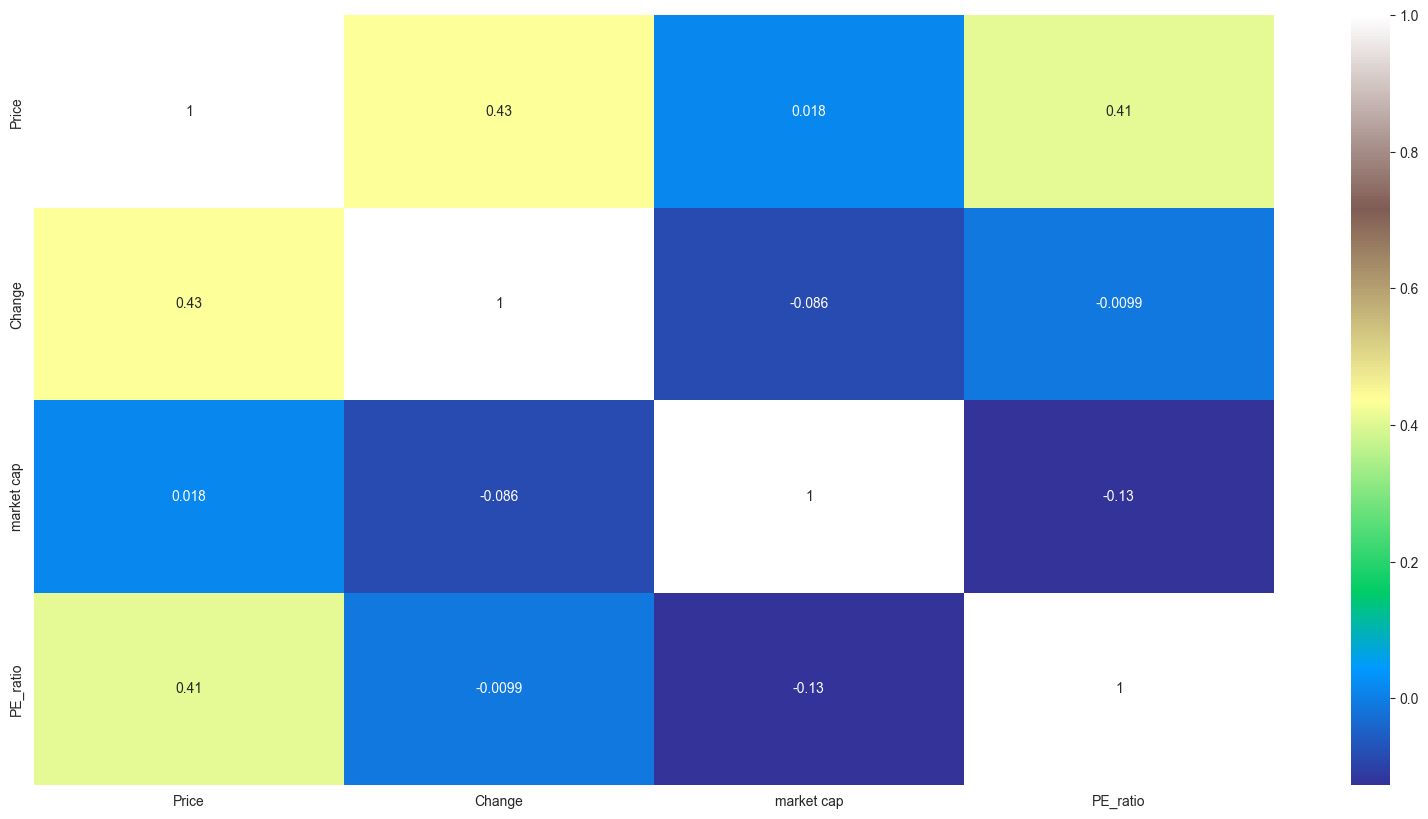

In [60]:
# Correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='terrain')
plt.show();

In [67]:
# Model
# Importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset into the Training set and Test set
X = df[['Change', 'PE_ratio', 'market cap']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

# Fitting Linear Regression to the Training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
X_test = sc.transform(X_test)
lr_y_pred = lr.predict(X_test)
print(lr_y_pred)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, lr_y_pred))
print('The R2 score is: %.2f'% r2_score(y_test, lr_y_pred))

[ 80.43583714  98.04981986 159.02057542  93.6415196   70.45073133
 279.81055626  17.84894346  73.01302211  72.36575209  82.95831923
 123.6223039   83.62703757  13.46016212   2.6910564  155.90596206
 105.00311235  95.40533124 154.96164583  53.81334432  85.42133673
 129.39131877  67.72763661 103.943904    73.27044657 105.00493919
 155.43041123  98.05425649 128.00821448  78.42835443  27.49314474
 128.00769252 160.15011014 129.62999726  44.57205597  93.21211497
  76.98513982 283.89445501 284.30694299 164.55410284  25.40708678
  94.53216819 281.63091542  53.37219567  64.62940122 282.94340027
  88.15443802 126.68413148  81.18583346 103.50588709  85.86666102
  80.72965686 171.690372    74.63999179  96.28444235 216.31811938
  92.17527237  24.15531599  24.11778206  80.98617919 155.87886726
  51.83070415 102.65455492 284.26548528 159.81031405 158.86602499
  96.34568193 231.4205125   78.89581494  70.4569948  284.35800086
 130.81730529 107.57214525   4.91006259  76.84641768  72.89922911
 154.99343

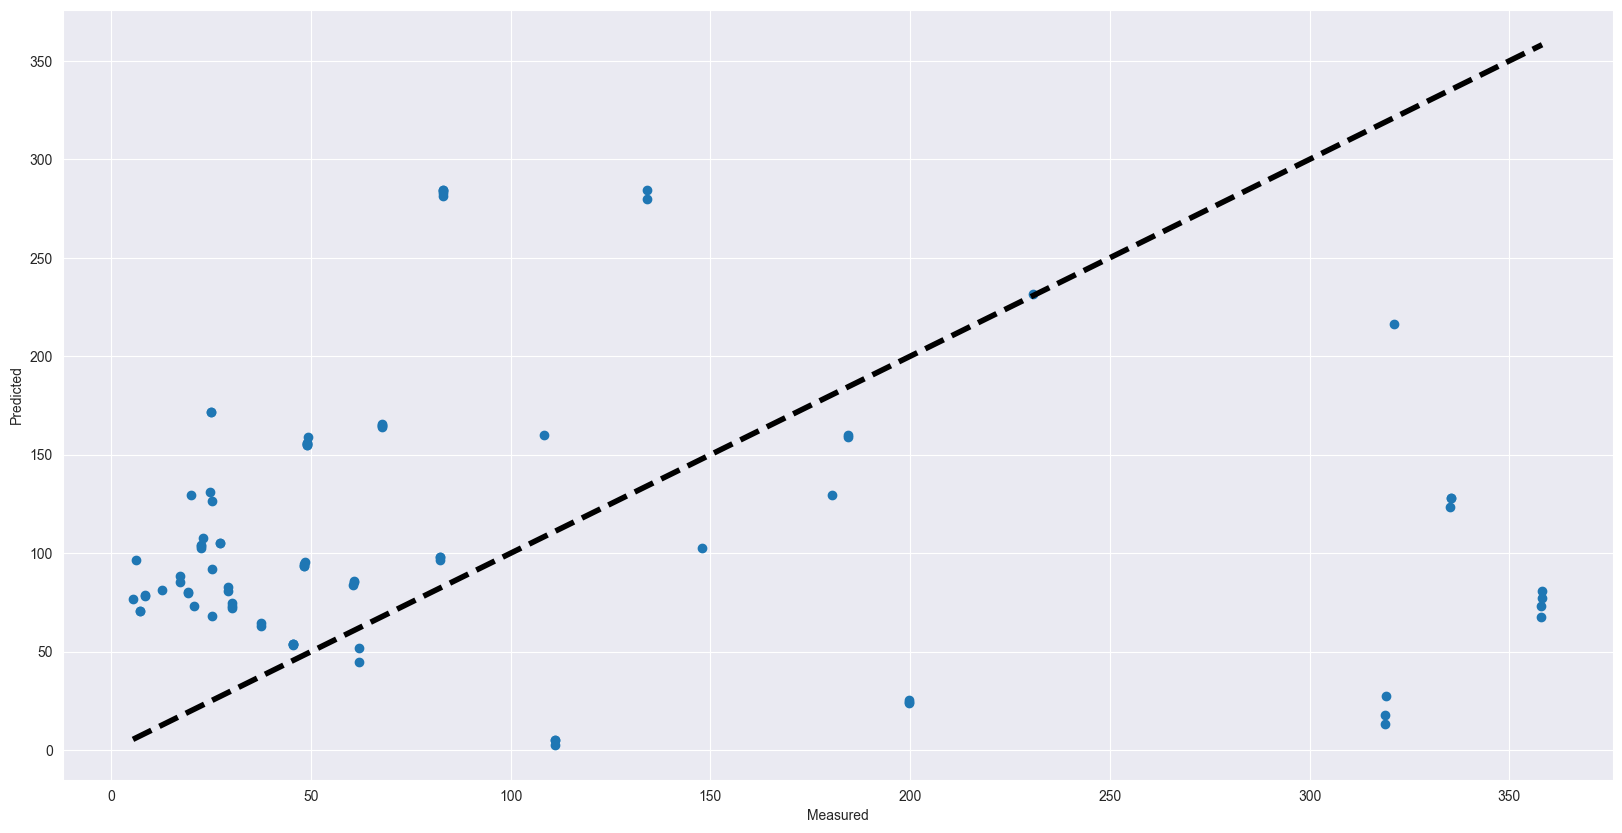

In [64]:
# Visualizing the model
plt.figure(figsize=(20, 10))
plt.scatter(y_test, lr_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

* Summary:  the model is not good because features are not linearly correlated with the target variable.

[ 19.16  82.32  49.14  48.33   7.16 133.99 318.91 358.12  30.27  29.13
 335.37  60.63 318.91 111.1   49.08  27.08  48.37  49.03  45.4   60.67
  20.02 357.91  22.29  30.27  27.08  49.06  82.32 335.37   8.39 319.12
 335.37 184.53 180.35  61.96  48.35 358.12  82.99  83.    67.79 199.62
  48.35  82.99  45.39  37.4   82.94  17.19  25.24  12.66  22.29  60.67
  29.11  25.    30.3   82.27 199.77  25.33 199.77 199.67 358.29  49.08
  62.12 147.88 134.05 108.35 184.49   6.1  230.76   8.4    7.16  83.
  25.33  22.93 111.18   5.42  20.67  49.05  19.15  37.37  67.8   17.23
  25.08  25.   111.18  45.4   67.81  67.78  22.29  45.4 ]
Mean squared error: 167.73
The R2 score is: 0.98


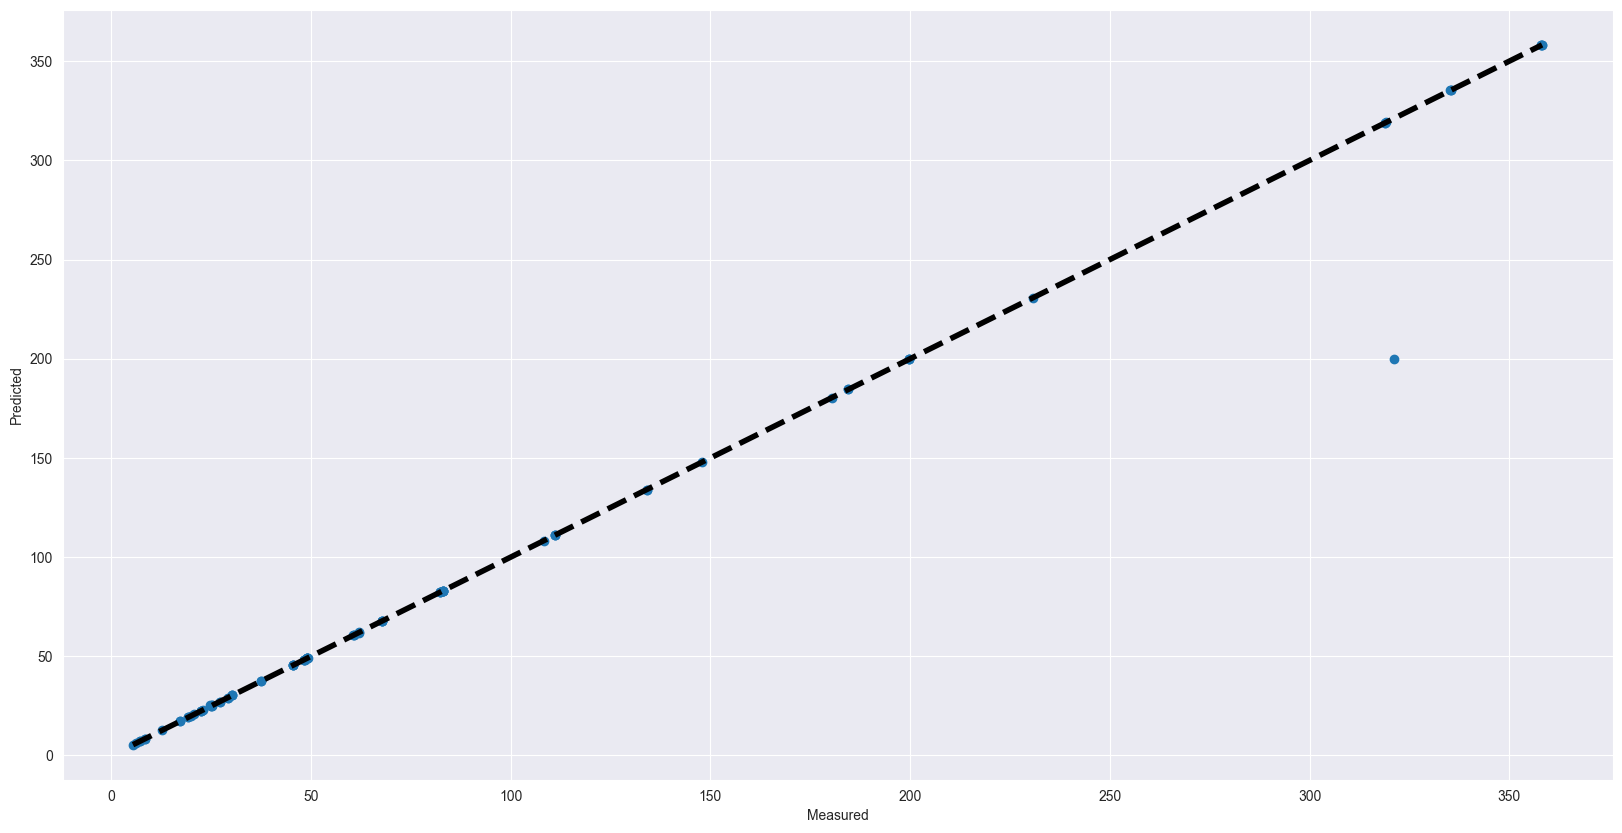

In [68]:
# Improving the model
# Fitting Decision Tree Regression to the dataset
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

# Predicting the Test set results
dt_y_pred = dt.predict(X_test)
print(dt_y_pred)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, dt_y_pred))
print('The R2 score is: %.2f'% r2_score(y_test, dt_y_pred))

# Visualizing the model
plt.figure(figsize=(20, 10))
plt.scatter(y_test, dt_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();

* The model has significantly improved. The R2 score has increased from -0.5 to 0.9. The MSE has decreased from 16131 to 167.

[ 18.804       82.305       49.1418      48.33125      9.2771
 133.9897     317.0845     326.6291      36.3355      29.0187
 325.4378      60.6361     317.0838     110.3163      49.0784
  27.0794      48.36918571  49.045       45.3996      60.6561
  19.9033     355.1303      21.2943      33.3047      27.0798
  49.0573      82.3048     332.0485       8.0075     311.6653
 332.0485     184.5298     176.2511      67.8853      48.34012333
 326.6468      82.9899      82.9985      68.9547     199.6236
  48.3549      82.9355      45.3898      37.4011      82.9407
  18.8007      25.0383      12.63440833  21.0836      60.6599
  27.6689      24.9731      30.2977      82.5432     207.6578
  23.1167     199.6681     199.6363     319.4919      49.0742
  62.1202     147.8763     136.0864     108.3599     184.5262
  87.55268333 188.2548       8.3984       9.2771      82.9984
  22.4873      28.4293     110.3489       5.9405      20.6325
  49.0502      19.0137      37.3682      68.9585      18.7157
  25

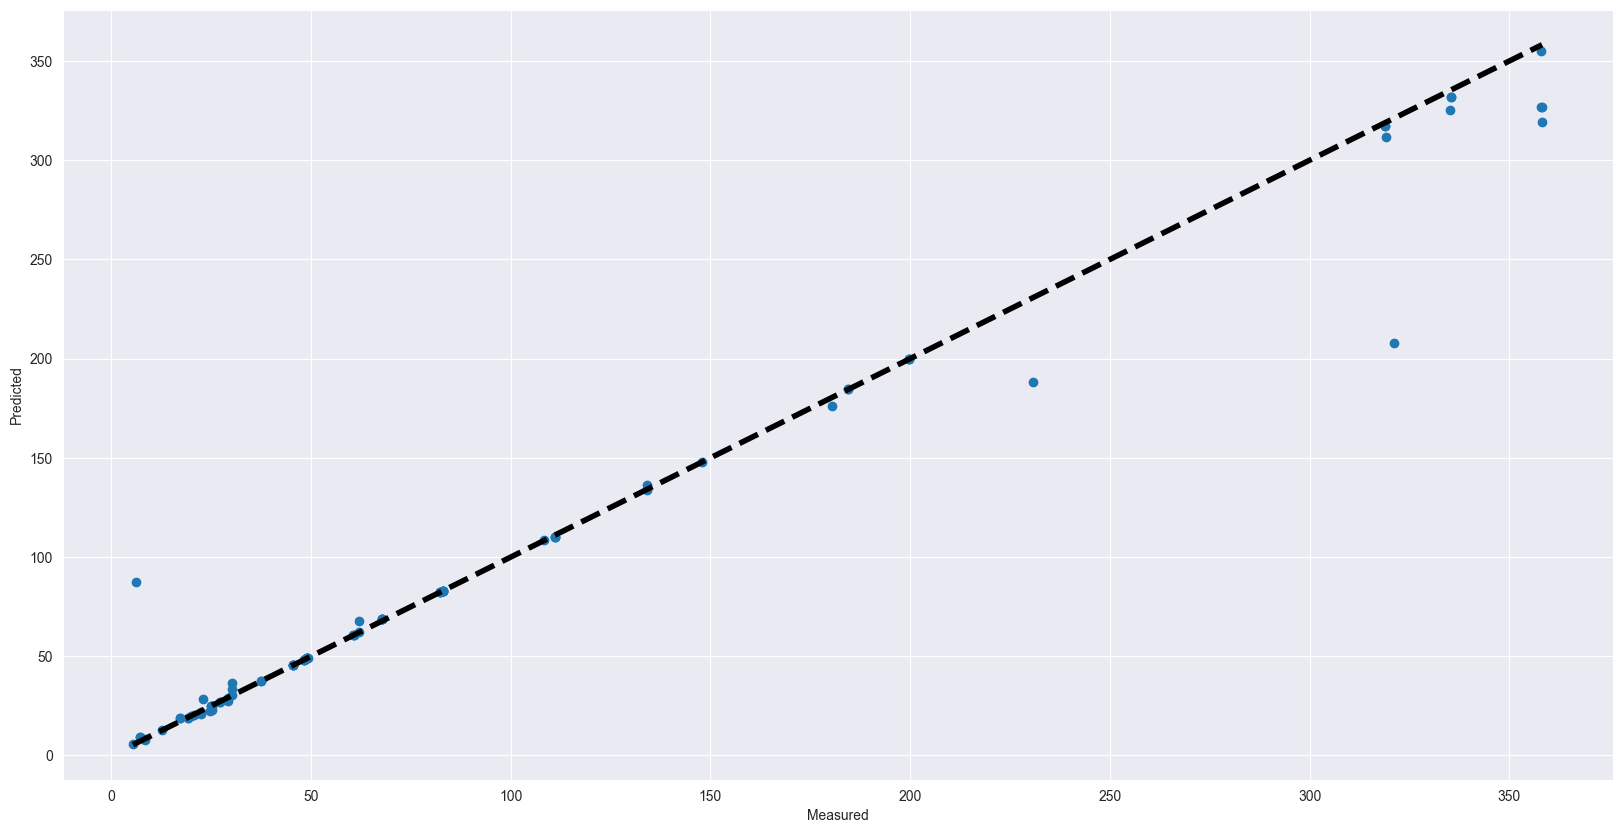

In [69]:
# Fitting Random Forest Regression to the dataset
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

# Predicting the Test set results
rf_y_pred = rf.predict(X_test)
print(rf_y_pred)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, rf_y_pred))
print('The R2 score is: %.2f'% r2_score(y_test, rf_y_pred))

# Visualizing the model
plt.figure(figsize=(20, 10))
plt.scatter(y_test, rf_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show();